# Converting Feature Classes to GeoDataframes


### Using Geopandas
* http://geopandas.org/io.html

*Importing feature classes using GeoPandas is easy with the `read_file()` command. What's worth noting is that GeoPandas actually uses the Python [Fiona](https://fiona.readthedocs.io/en/latest/manual.html) package. Fiona leverages a collection of drivers that provide access to a number of geospatial data formats. Geopandas simplifies the usage of Fiona commands, making import and export of geodataframes easier to use.*

### Reading a shapefile into a GeoDataFrame
* Read in `./data/12Digit_HUC_Subwatersheds.shp` into a geodataframe

In [1]:
#Import geopandas
import geopandas as gpd

In [2]:
#Create a variable pointing to the shapefile. 
theShapefile = './data/12Digit_HUC_Subwatersheds.shp'

In [3]:
#Read the shapefile directly into a geodataframe
gdf_HUC12 = gpd.read_file(theShapefile)

### Exploring the geodataframe

In [4]:
#View the first 5 rows
gdf_HUC12.head()

,FID,HUC_8,HUC_10,HUC_12,ACRES,HU_10_NAME,HU_12_NAME,META_ID,STATES,Basin,Dig_8,DWQ_Basin,geometry
0,1,03040208,0304020802,030402080205,7321,Shallotte River,Holden Beach-Long Bay,NC01,NC,LBR,3040208,Lumber,"MULTIPOLYGON (((-78.38724 33.89810, -78.38902 ..."
1,2,03030005,0303000508,030300050804,18971,Cape Fear River,Frying Pan Shoals-Cape Fear River,NC01,NC,CPF,3030005,Cape Fear,"MULTIPOLYGON (((-78.01315 33.88848, -78.01196 ..."
2,3,03040208,0304020801,030402080108,8639,Lockwoods Folly River,Town of Long Beach-Long Beach,NC01,NC,LBR,3040208,Lumber,"POLYGON ((-78.10634 33.90837, -78.10581 33.908..."
3,4,03040208,0304020802,030402080201,9136,Shallotte River,Upper Shallotte River,NC01,NC,LBR,3040208,Lumber,"POLYGON ((-78.44404 33.97957, -78.44434 33.978..."
4,5,03040208,0304020801,030402080107,7610,Lockwoods Folly River,Town of Long Beach-Montgomery Slough,NC01,NC,LBR,3040208,Lumber,"POLYGON ((-78.14777 33.95042, -78.14716 33.949..."


In [5]:
#View info for the dataframe
gdf_HUC12.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         1767 non-null   int64   
 1   HUC_8       1767 non-null   object  
 2   HUC_10      1767 non-null   object  
 3   HUC_12      1767 non-null   object  
 4   ACRES       1767 non-null   int64   
 5   HU_10_NAME  1767 non-null   object  
 6   HU_12_NAME  1767 non-null   object  
 7   META_ID     1767 non-null   object  
 8   STATES      1767 non-null   object  
 9   Basin       1767 non-null   object  
 10  Dig_8       1767 non-null   int64   
 11  DWQ_Basin   1767 non-null   object  
 12  geometry    1767 non-null   geometry
dtypes: geometry(1), int64(3), object(9)
memory usage: 179.6+ KB


In [6]:
#Display a specific record
gdf_HUC12.loc[10]

FID                                                          11
HUC_8                                                  03040206
HUC_10                                               0304020606
HUC_12                                             030402060605
ACRES                                                      8272
HU_10_NAME                            Gore Creek-Waccamaw River
HU_12_NAME                          Regan Branch-Waccamaw River
META_ID                                                    NC01
STATES                                                       NC
Basin                                                       LBR
Dig_8                                                   3040206
DWQ_Basin                                                Lumber
geometry      POLYGON ((-78.58374604910919 34.0595876285612,...
Name: 10, dtype: object

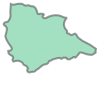

In [7]:
#Display a specific geometry
gdf_HUC12.loc[10,'geometry']

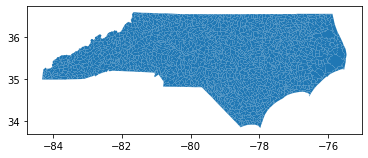

In [9]:
#Display as simple polygon FC
gdf_HUC12.plot();

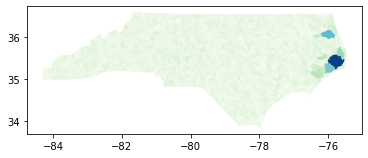

In [11]:
#Display acres as continuous values
gdf_HUC12.plot('ACRES', cmap='GnBu');

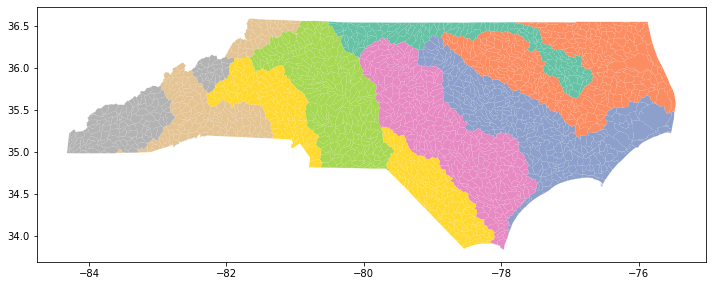

In [13]:
#Display as chorpleth map using HUC8 attribute
gdf_HUC12.plot('HUC_8',cmap='Set2', figsize=(12,6));

---
### Reading GeoJSON data
* Read in the `./data/NC_NPDES.json` data ([Source](https://services.nconemap.gov/secure/rest/services/NC1Map_Environment/FeatureServer/4/query?where=OBJECTID>0&outFields=*&f=geojson) - in JSON format) into a geodataframe

In [14]:
#Read the data in
gdf_NPDES = gpd.read_file('./data/NC_NPDES.json')

#### Explore as above, then plot on a given attribute

In [15]:
gdf_NPDES.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   OBJECTID                    1000 non-null   int64   
 1   onemap.SDEADMIN.npdes.AREA  1000 non-null   int64   
 2   PERIMETER                   1000 non-null   int64   
 3   NPDES0306_                  1000 non-null   int64   
 4   NPDES0306_ID                1000 non-null   int64   
 5   PERMIT                      1000 non-null   object  
 6   OWNER                       1000 non-null   object  
 7   FACILITY                    1000 non-null   object  
 8   COUNTY                      1000 non-null   object  
 9   REGION                      1000 non-null   object  
 10  TYPE                        1000 non-null   object  
 11  CLASS                       1000 non-null   object  
 12  SUBBASIN                    1000 non-null   int64   
 13  RECEIVING_ 

In [16]:
gdf_NPDES.head()

,OBJECTID,onemap.SDEADMIN.npdes.AREA,PERIMETER,NPDES0306_,NPDES0306_ID,PERMIT,OWNER,FACILITY,COUNTY,REGION,...,RECEIVING_,UT_,LATITUDE,LONGITUDE,DDLAT,DDLONG,POLYGONID,SCALE,ANGLE,geometry
0,1,0,0,0,0,NC0000019,United Chemi-Con Manufacturing Inc,United Chemi-Con Manufacturing,Ashe,Winston-Salem,...,North Fork New River,no,36284200,-81302100,36.478333,-81.505833,0,1,1,POINT (-81.50584 36.47834)
1,2,0,0,0,0,NC0000078,RFS Ecusta Inc,"RFS Ecusta, Inc. ( 1 Ecusta )",Transylvania,Asheville,...,FRENCH BROAD RIVER,no,35150300,-82413400,35.250833,-82.692778,0,1,1,POINT (-82.69278 35.25084)
2,3,0,0,0,0,NC0000094,Fletcher Warehousing Company,Fletcher Warehousing Company,Henderson,Asheville,...,FRENCH BROAD RIVER,no,35244400,-82321800,35.412222,-82.538333,0,1,1,POINT (-82.53834 35.41223)
3,4,0,0,0,0,NC0000108,Coats American Inc,Sylvan Plant,Transylvania,Asheville,...,Galloway Creek,no,35100000,-82483000,35.166667,-82.808333,0,1,1,POINT (-82.80834 35.16667)
4,5,0,0,0,0,NC0000175,Unimin Corporation,Quartz Operation,Mitchell,Asheville,...,North Toe River,no,35555800,-82061100,35.932778,-82.103056,0,1,1,POINT (-82.10306 35.93278)


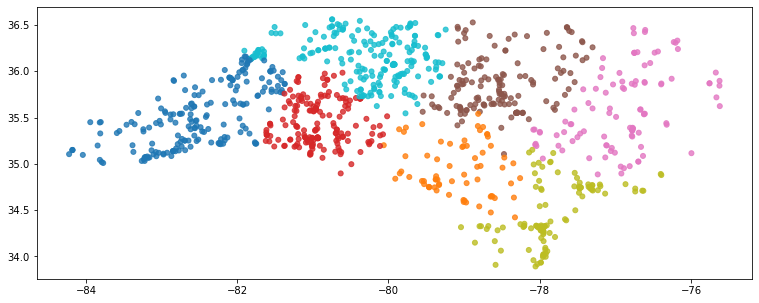

In [21]:
#Plot the feature class
gdf_NPDES.plot('REGION',
               marker='.',
               alpha=0.8,
               markersize=100,
               figsize=(18,5));